<a href="https://colab.research.google.com/github/aamirkhanov/mu2e_crv/blob/main/DeadTimeEstimatorMDC2020_thresholds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init and cuts definition

In [1]:
!pip install hist
!pip install mplhep
import hist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 27.9 MB/s eta 0:00:00


In [2]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

#h5fileCE='drive/MyDrive/root_files_cry5/trk.mu2e.CeEndpointMix1BBSignal.MDC2020r_perfect_v1_0.h5'
#h5fileCE='drive/MyDrive/root_files_cry5/trk.mu2e.CeEndpointMix2BBSignal.MDC2020r_perfect_v1_0.h5'
#h5fileCRY5='drive/MyDrive/root_files_cry5/trk.mu2e.CosmicCRYOnSpillSignal.MDC2020r_perfect_v1_0.h5'

#h5fileCE='drive/MyDrive/root_files_cry5/thresholds/trkana/trkana.amirkhan.CeEndpointMix2BBSignal_CRVthr_14PE_trkana_v02_01_00.h5'

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/MyDrive/'
except:
    main_path = ''
sys.path.append(main_path)

Mounted at /content/drive


In [3]:
import mplhep as hep
hep.style.use('ATLAS')  # or ATLAS/LHCb2

In [4]:
!pip install -I git+https://github.com/oksuzian/mu2etools.git
from mu2etools import utils, cuts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/oksuzian/mu2etools.git to /tmp/pip-req-build-_sqk19y1
  Running command git clone --filter=blob:none --quiet https://github.com/oksuzian/mu2etools.git /tmp/pip-req-build-_sqk19y1
  Resolved https://github.com/oksuzian/mu2etools.git to commit 1b8a2b88b5ce01e074aa5e1b62ecc36c5bfa5dfe
  Preparing metadata (setup.py) ... done
  Created wheel for mu2etools: filename=mu2etools-0.0.1-py3-none-any.whl size=5997 sha256=44ea77c37707bc81ed45057e69b04e77f673957ff05eb2452de8cae344ba3918
  Stored in directory: /tmp/pip-ephem-wheel-cache-rtqit0fe/wheels/05/93/83/22c1716509403ef9c7f2db50b8af876afc842ed412f0b4ccca
Successfully built mu2etools


In [5]:
TMIN = -160
TMAX = 140
PMIN_EXT = 90
PMAX_EXT = 140
PMIN_PHY = 103.85
PMAX_PHY = 105.1

#Default MDC-style cut box
cuts = [
    "(de_status > 0)",
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 105)",
    "(deent_maxr > 450)",
    "(deent_maxr < 680)"
]
cut_tbox = " & ".join(cuts)

#PID, TrkQual and cut on events with an usptream leg
cuts = [
    "(dequal_TrkQual > 0.8)",
    "(dequal_TrkPID > 0.95)",
    "(ue_status <= 0)"
]
cut_pid_trkqual_ue = " & ".join(cuts)

# Extended momentum window cut`
cuts = [
    "(deent_mom > %f)" % PMIN_EXT,
    "(deent_mom < %f)" % PMAX_EXT
]
cut_extmom = " & ".join(cuts)

# Physics momentum window cut`
cuts = [
    "(deent_mom > %f)" % PMIN_PHY,
    "(deent_mom < %f)" % PMAX_PHY,
]
cut_phymom = " & ".join(cuts)

# Loose box cuts
cuts = [
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 205)",
    "(deent_maxr > 450)"
]
cut_lbox = " & ".join(cuts)

cut_t0='(de_t0 > 650) & (de_t0 < 1625)'
#crv_live_window='((crvinfo_timeWindowStart > 475 & crvinfo_timeWindowStart < 1650) | crvinfo_timeWindowStart<1)'
crv_live_window='((debestcrv_timeWindowStart > 475 & debestcrv_timeWindowStart < 1650) | debestcrv_timeWindowStart<1)'
# Outside of the coincidence time window
#crv_time = "(de_t0 < crvinfo_timeWindowStart + %d | de_t0 > crvinfo_timeWindowEnd + %d)" % (TMIN, TMAX)
crv_time = "(de_t0 < debestcrv_timeWindowStart + %d | de_t0 > debestcrv_timeWindowEnd + %d)" % (TMIN, TMAX)
# Outside of the coincidence angular window
#crv_angle = "(crvinfo_angle < %d | crvinfo_angle > %d)" % (-2.5, 2.5)
crv_angle = "(debestcrv_angle < %d | debestcrv_angle > %d)" % (-2.5, 2.5)


#crv_time = "(crvinfo_dTe < %d | crvinfo_dTe > %d)" % (TMIN, TMAX)
#crv_time = crv_time+"& ( crvinfo_dTe < %d | crvinfo_dTe > %d)" % (-100, 150)
#crv_time = crv_time+"& (de_t0 < crvinfo_timeWindowStart | de_t0> crvinfo_timeWindowEnd)" 
#Combime cuts
cut_nomom  = cut_tbox +" & "+cut_pid_trkqual_ue
cut_extmom = cut_tbox +" & "+cut_pid_trkqual_ue+" & "+cut_extmom
cut_phymom = cut_tbox +" & "+cut_pid_trkqual_ue+" & "+cut_phymom
cut_loose  = cut_lbox +" & "+cut_pid_trkqual_ue

cut_extmom_notiming = cut_extmom
#cut_extmom = cut_extmom+" & " + cut_t0+" & " + crv_live_window
#cut_current = cut_extmom+" & ("+crv_time+" | "+crv_angle+")"
cut_current = cut_extmom+" & "+crv_time

#Load dataframe

In [8]:
h5path = 'drive/MyDrive/root_files_cry5/thresholds/trkana/'
dfCEs_dict = {
    'CE1B':{
        '8PE':h5path+'trkana.amirkhan.CeEndpointMix1BBSignal_CRVthr_8PE_trkana_v02_01_00.h5',
        '10PE':h5path+'trkana.amirkhan.CeEndpointMix1BBSignal_CRVthr_10PE_trkana_v02_01_00.h5',
        '12PE':h5path+'trkana.amirkhan.CeEndpointMix1BBSignal_CRVthr_12PE_trkana_v02_01_00.h5',
        '14PE':h5path+'trkana.amirkhan.CeEndpointMix1BBSignal_CRVthr_14PE_trkana_v02_01_00.h5'
    },
    'CE2B':{
        '8PE':h5path+'trkana.amirkhan.CeEndpointMix2BBSignal_CRVthr_8PE_trkana_v02_01_00.h5',
        '10PE':h5path+'trkana.amirkhan.CeEndpointMix2BBSignal_CRVthr_10PE_trkana_v02_01_00.h5',
        '12PE':h5path+'trkana.amirkhan.CeEndpointMix2BBSignal_CRVthr_12PE_trkana_v02_01_00.h5',
        '14PE':h5path+'trkana.amirkhan.CeEndpointMix2BBSignal_CRVthr_14PE_trkana_v02_01_00.h5'
    }
}

dfCE_th = pd.DataFrame()
for bunches in ['CE1B','CE2B']:
  for PEs in ['8PE','10PE','12PE','14PE']:
    #dfCEs[bunches][PEs] = pd.read_hdf(dfCEs_dict[bunches][PEs], mode='r', key=bunches).query('lyield==%i' % 17000)
    print('Reading ' + bunches + " " + PEs)
    df_ = pd.read_hdf(dfCEs_dict[bunches][PEs], mode='r', key=bunches).query('lyield==%i' % 17000)
    dfCE_th = dfCE_th.append(df_)

Reading CE1B 8PE


<ipython-input-8-ce78dea4599f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCE_th = dfCE_th.append(df_)


Reading CE1B 10PE


<ipython-input-8-ce78dea4599f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCE_th = dfCE_th.append(df_)


Reading CE1B 12PE


<ipython-input-8-ce78dea4599f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCE_th = dfCE_th.append(df_)


Reading CE1B 14PE


<ipython-input-8-ce78dea4599f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCE_th = dfCE_th.append(df_)


Reading CE2B 8PE


<ipython-input-8-ce78dea4599f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCE_th = dfCE_th.append(df_)


Reading CE2B 10PE


<ipython-input-8-ce78dea4599f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCE_th = dfCE_th.append(df_)


Reading CE2B 12PE


<ipython-input-8-ce78dea4599f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCE_th = dfCE_th.append(df_)


Reading CE2B 14PE


<ipython-input-8-ce78dea4599f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCE_th = dfCE_th.append(df_)


In [ ]:
var_dict = utils.getVarList('allCRY5')

utils.LIVETIME_LO_CRY5 = 1.15E8*780/907
utils.LIVETIME_HI_CRY5 = 3.83E6*190/323

nLTimesCRY5 = [utils.LIVETIME_LO_CRY5/utils.LIVETIME_MU2E, utils.LIVETIME_HI_CRY5/utils.LIVETIME_MU2E]

title=["low", "high"]

for var in var_dict.keys():
  if "deent_z0" in var or "deent_om" in var: 
    continue

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
  h = hist.Hist(
    hist.axis.StrCategory(["ce", "cry5"], name="cat"),
    hist.axis.Regular(50, var_dict[var][0], var_dict[var][1], name="x", label="w [units]"),
    hist.storage.Weight(),
  ) 

  cut_tmp='(deent_mom > 100) & (deent_mom < 110)'
  for i in [0,1]:
    h.reset()
    h.fill(cat="ce", x=dfCE.query(cut_tbox + '& is_high==-1')[var].to_numpy())
    h.fill(cat="cry5", x=dfCRY5.query(cut_tbox + '& is_high==%d'%i)[var].to_numpy())

    h_tmp=(h["ce", :] / h["ce", :].counts().sum())
    h_tmp.plot(ax=axes[i], label='ce: %.2f'%h_tmp.counts().sum())
    h_tmp=(h["cry5", :] / h["cry5", :].counts().sum())
    h_tmp.plot(ax=axes[i], label='cry5: %.2f'%h_tmp.counts().sum())

    axes[i].set_xlabel(var)
    axes[i].set_title(title[i])
    axes[i].legend()


#Background estimation: production sources

In [ ]:
plt.hist(dfCE.query(cut_extmom+'& crvinfo_timeWindowStart>0')['crvinfo_dTs'], bins=400, range=(-1000, 1000), histtype='step', label='CE before CRV veto');
plt.hist(dfCE.query(cut_current+'& crvinfo_timeWindowStart>0')['crvinfo_dTs'], bins=400, range=(-1000, 1000), histtype='step', label='CE after CRV veto');
plt.hist(dfCRY5.query(cut_extmom+'& crvinfo_timeWindowStart>0')['crvinfo_dTs'], histtype='step', bins=400, range=(-1000, 1000), label='CRY before CRV veto');
plt.hist(dfCRY5.query(cut_current+'& crvinfo_timeWindowStart>0')['crvinfo_dTs'], histtype='step', bins=400, range=(-1000, 1000), label='CRY after CRV veto');

plt.xlabel('dT (CRV-tracker) [ns]')
plt.legend(fontsize=13)
plt.xlim(-500, 500)
plt.yscale('log')

plt.figure()
plt.hist(dfCE.query(cut_extmom+'& crvinfo_timeWindowStart>0')['crvinfo_dTe'], bins=400, range=(-1000, 1000), histtype='step', label='CE before CRV veto');
plt.hist(dfCE.query(cut_current+'& crvinfo_timeWindowStart>0')['crvinfo_dTe'], bins=400, range=(-1000, 1000), histtype='step', label='CE after CRV veto');
plt.hist(dfCRY5.query(cut_extmom+'& crvinfo_timeWindowStart>0')['crvinfo_dTe'], histtype='step', bins=400, range=(-1000, 1000), label='CRY before CRV veto');
plt.hist(dfCRY5.query(cut_current+'& crvinfo_timeWindowStart>0')['crvinfo_dTe'], histtype='step', bins=400, range=(-1000, 1000), label='CRY after CRV veto');

plt.xlabel('dT (CRV-tracker) [ns]')
plt.legend(fontsize=13)
plt.xlim(-500, 500)
plt.yscale('log')

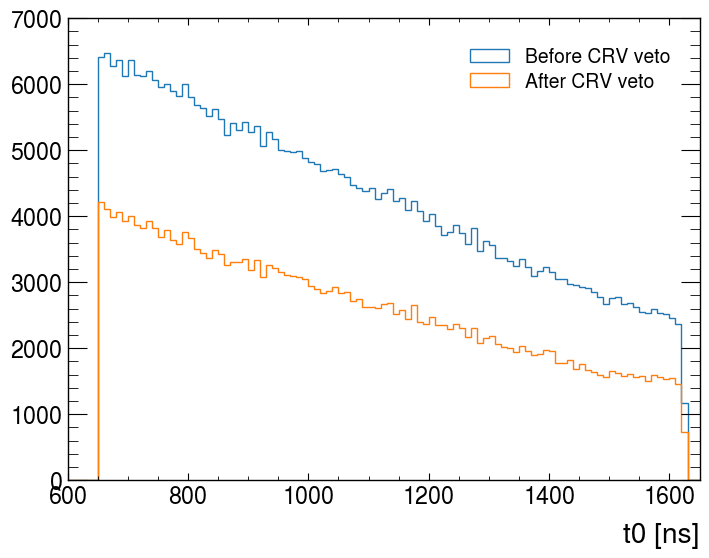

In [ ]:
plt.hist(dfCE.query(cut_extmom+" & " + cut_t0+" & " + crv_live_window)['de_t0'], bins=110, range=(600, 1700), histtype='step', label='Before CRV veto');
plt.hist(dfCE.query(cut_current+" & " + cut_t0+" & " + crv_live_window)['de_t0'], bins=110, range=(600, 1700), histtype='step', label='After CRV veto');
plt.xlabel('t0 [ns]')
plt.xlim(600, 1650)
plt.legend();

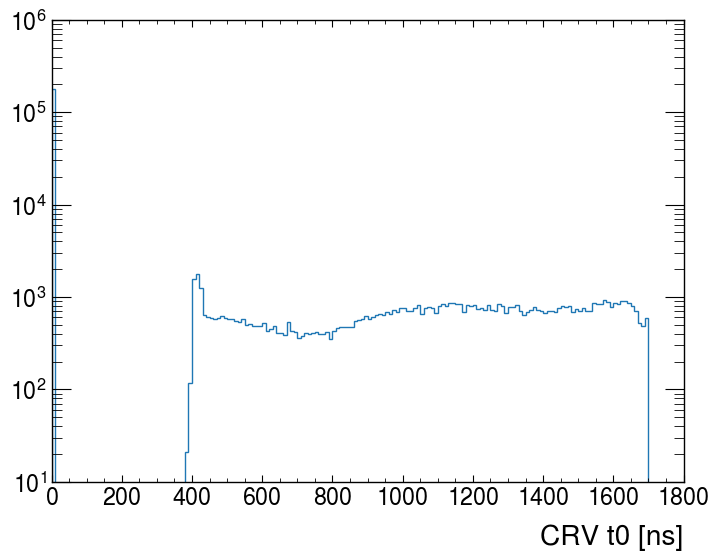

In [ ]:
plt.hist(dfCE.query(cut_current+" & " + cut_t0)['debestcrv_timeWindowStart'], bins=170, range=(0, 1700), histtype='step', label='After CRV cuts');
plt.xlabel('CRV t0 [ns]')
plt.yscale('log')

In [ ]:
cut_current

'(de_status > 0) & (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 105) & (deent_maxr > 450) & (deent_maxr < 680) & (dequal_TrkQual > 0.8) & (dequal_TrkPID > 0.95) & (ue_status <= 0) & (deent_mom > 90.000000) & (deent_mom < 140.000000) & (de_t0 < crvinfo_timeWindowStart + -160 | de_t0 > crvinfo_timeWindowEnd + 140)'

In [14]:
pd.set_option('display.max_columns', None) 
dfCE_th

evtinfo_eventid  evtinfo_subrunid  evtinfomc_nprotons  de_status  \
0                     2               600            11789656          2   
1                     3               600            16861824          2   
2                     7               600             8755203          1   
3                    11               600            19976817          2   
4                    14               600            10503905          1   
...                 ...               ...                 ...        ...   
922350             3995               429            25446364          1   
922351             3996               429            20747390          1   
922352             3998               429            67560639          1   
922353             3999               429             4251982          2   
922354             4000               429            14541900          2   

        de_pdg  de_nhits       de_t0   deent_d0  deent_maxr  deent_td  \
0           11        48  619.321228 -35.074463  534.311218  0.665209   
1           11        35  447.316162  73.479347  600.259460  0.829277   
2           11        46  613.886353  13.979434  539.723022  0.719890   
3           11        31  462.179504   3.385965  497.547791  0.937592   
4           11        44  579.916077   9.988123  566.891602  0.724607   
...        ...       ...         ...        ...         ...       ...   
922350      11        47  967.190613  73.085785  641.056519  0.696952   
922351      11        50  852.016296  23.892517  590.951111  0.665936   
922352      11        41  945.656128  37.604382  559.827881  0.858475   
922353      11        45  621.100037  47.286839  615.627441  0.686609   
922354      11        34  701.752502   6.696432  541.302673  0.802772   

        detrkpid_DeltaE  detrkpid_ClusterLength  detrkpid_RPOCA  \
0            -26.800850               22.216349      499.135529   
1            -18.211601               38.086147      615.158142   
2            -18.815712              -24.314112      529.049011   
3            -36.537071                3.293103      426.863831   
4            -17.392334               26.764027      413.628479   
...                 ...                     ...             ...   
922350       -30.549492               59.457336      493.717896   
922351       -10.433113               25.759544      579.361694   
922352       -21.099625               23.131737      456.809540   
922353       -14.721489              143.253967      415.846008   
922354       -11.385620               23.074127      525.288147   

        detrkpid_TrackDirection  detrkpid_DeltaT  detrkpid_mvaout  \
0                      0.301999         2.692910         0.999965   
1                      0.039419         3.281835         0.999995   
2                     -0.173813         2.953772         0.999966   
3                      0.679219         2.821218         0.999739   
4                     -0.693660         3.194525         0.999968   
...                         ...              ...              ...   
922350                 0.740274         2.698722         0.999992   
922351                -0.259722         2.497948         0.999980   
922352                -0.648687         2.440713         0.999973   
922353                 0.871196         3.003798         0.999999   
922354                -0.285776         3.199363         0.999979   

        detrkpid_mvastat  detrkpid_disk0frad  detrkpid_disk1frad  \
0                      2          268.691620          502.043884   
1                      2          610.931824          113.801308   
2                      2           51.143967          538.201477   
3                      2          419.179565          349.958618   
4                      2          433.483521          419.076202   
...                  ...                 ...                 ...   
922350                 2          434.315857          421.741028   
922351                 2          582.23

(array([3.0686e+04, 1.4275e+04, 1.2837e+04, 9.1602e+04, 0.0000e+00,
        4.5940e+03, 3.3000e+01, 0.0000e+00, 0.0000e+00, 6.9000e+01]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

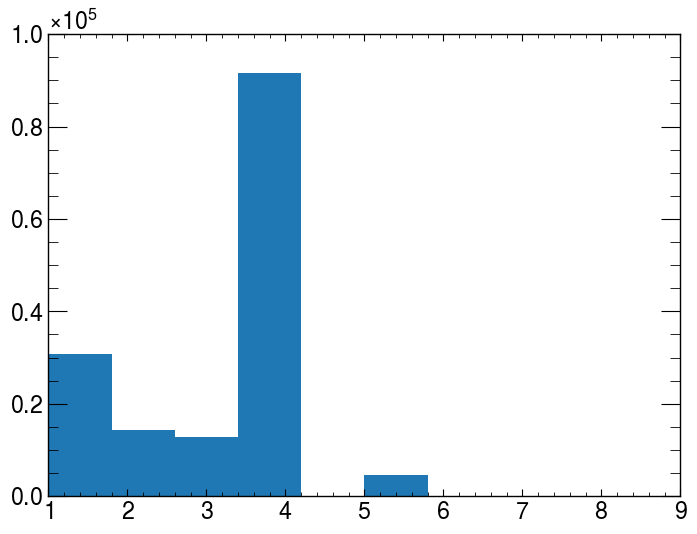

In [22]:
plt.hist(dfCE_th.query('bunches == 2 & PE_threshold == 8 & crvsummary_totalPEs != 0 &' + cut_current)['crvsummarymc_crvSectorType'])

In [12]:
PEs = [8, 10, 12, 14]
eff_1B=[]
eff_2B=[]
for bunches in [1, 2]:
  for PE in [8, 10, 12, 14]:
    #dfCE = dfCE_th.query('bunches==%d & PE_threshold==%d & crvsummarymc_crvSectorNumber != 4' % (bunches, PE))
    dfCE = dfCE_th.query('bunches==%d & PE_threshold==%d & debestcrv_crvSectorType != 4' % (bunches, PE))
    
    #dfCE = dfCE_th.query('bunches==%d & PE_threshold==%d' % (bunches, PE))
    eff = len(dfCE.query(cut_current)) / len(dfCE.query(cut_extmom))
    if bunches == 1: eff_1B.append(eff)
    if bunches == 2: eff_2B.append(eff)
    print('CE%dB PE=%d efficiency=%f' % (bunches, PE, eff))
    


CE1B PE=8 efficiency=0.947449
CE1B PE=10 efficiency=0.959525
CE1B PE=12 efficiency=0.966612
CE1B PE=14 efficiency=0.970109
CE2B PE=8 efficiency=0.666589
CE2B PE=10 efficiency=0.715673
CE2B PE=12 efficiency=0.752360
CE2B PE=14 efficiency=0.772016


Text(0, 1, 'efficiency')

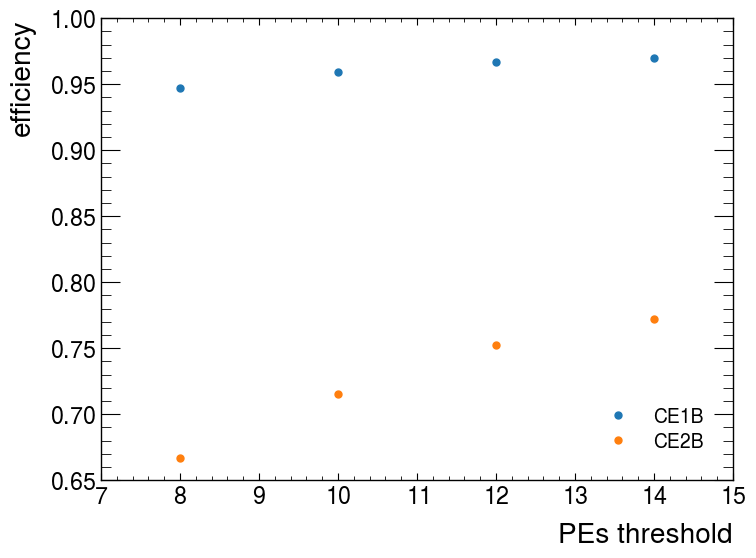

In [13]:
plt.plot(PEs, eff_1B, '.', label='CE1B', markersize=10)
plt.plot(PEs, eff_2B, '.', label='CE2B', markersize=10)
plt.legend()
plt.xlim([7,15])
plt.xlabel('PEs threshold')
plt.ylabel('efficiency')

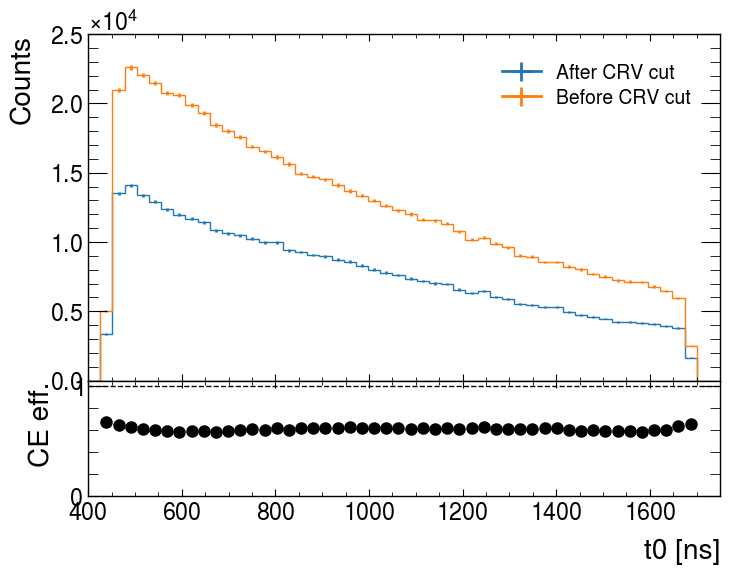

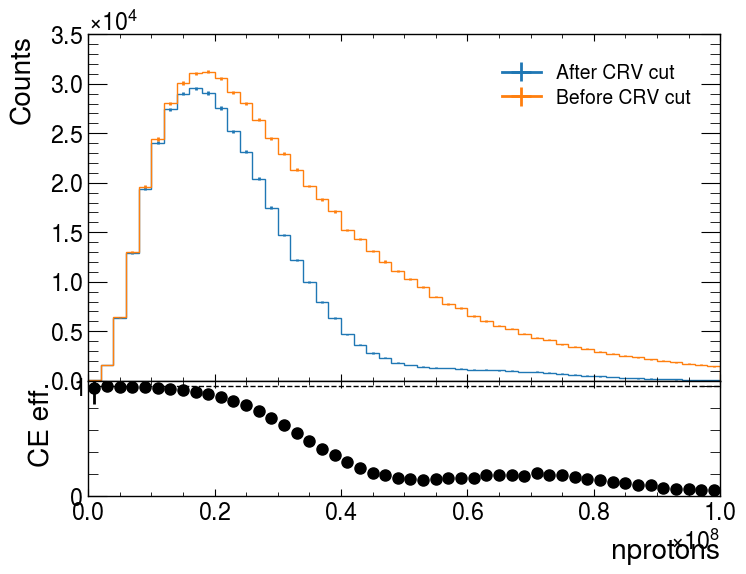

In [ ]:
dfCE = dfCE_th.query('bunches==2 & PE_threshold==14')

h = hist.Hist(
  hist.axis.StrCategory(["all", "cut", "all", "cut"], name="cat"),
  hist.axis.Regular(50, 400, 1700, name="x", label="t0 [ns]"),
  hist.storage.Weight(),
) 

h.fill(cat="all", x=dfCE.query(cut_extmom)['de_t0'].to_numpy())
h.fill(cat="cut", x=dfCE.query(cut_current)['de_t0'].to_numpy());

fig = plt.figure()
h["cut", :].plot_ratio(h["all", :], rp_num_label="After CRV cut", rp_denom_label="Before CRV cut", rp_ylim=[0.0, 1.05], rp_uncert_draw_type='line');
fig.get_axes()[1].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
fig.get_axes()[1].set_ylabel('CE eff.')
fig.get_axes()[1].set_xlim(400,1750)

h = hist.Hist(
  hist.axis.StrCategory(["all", "cut", "all", "cut"], name="cat"),
  hist.axis.Regular(50, 0, 1E8, name="x", label="nprotons"),
  hist.storage.Weight(),
) 

h.fill(cat="all", x=dfCE.query(cut_extmom)['evtinfomc_nprotons'].to_numpy())
h.fill(cat="cut", x=dfCE.query(cut_current)['evtinfomc_nprotons'].to_numpy());

fig = plt.figure()
h["cut", :].plot_ratio(h["all", :], rp_num_label="After CRV cut", rp_denom_label="Before CRV cut", rp_ylim=[0.0, 1.05], rp_uncert_draw_type='line');
fig.get_axes()[1].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
fig.get_axes()[1].set_ylabel('CE eff.');

#plot
#x: thresholds
#y: (1 - CEeff)
#y: (1 - CEeff)/background_cosmic

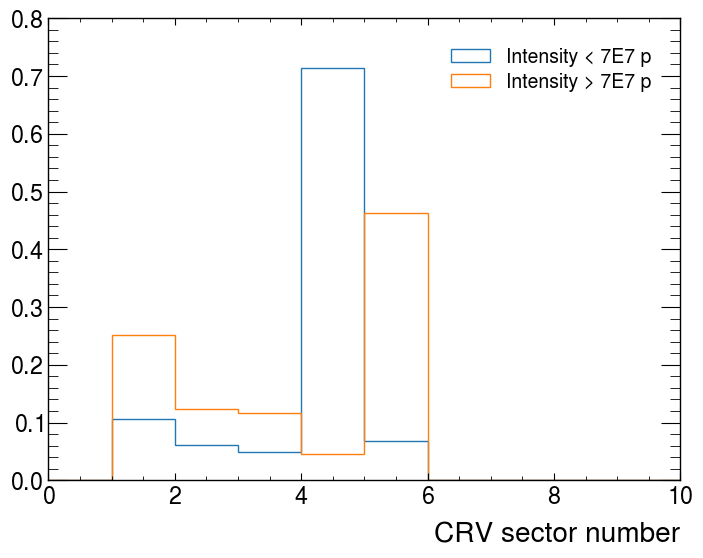

In [ ]:
plt.hist(dfCE.query(cut_extmom+'&'+crv_time+'& evtinfomc_nprotons<7E7 & debestcrv_PEs>0')['debestcrv_crvSectorType'], bins=np.linspace(0, 10, 11), histtype='step', density=True, label='Intensity < 7E7 p') 
plt.hist(dfCE.query(cut_extmom+'&'+crv_time+'& evtinfomc_nprotons>7E7 & debestcrv_PEs>0')['debestcrv_crvSectorType'], bins=np.linspace(0, 10, 11), histtype='step', density=True, label='Intensity > 7E7 p')
plt.xlabel('CRV sector number')
plt.legend();

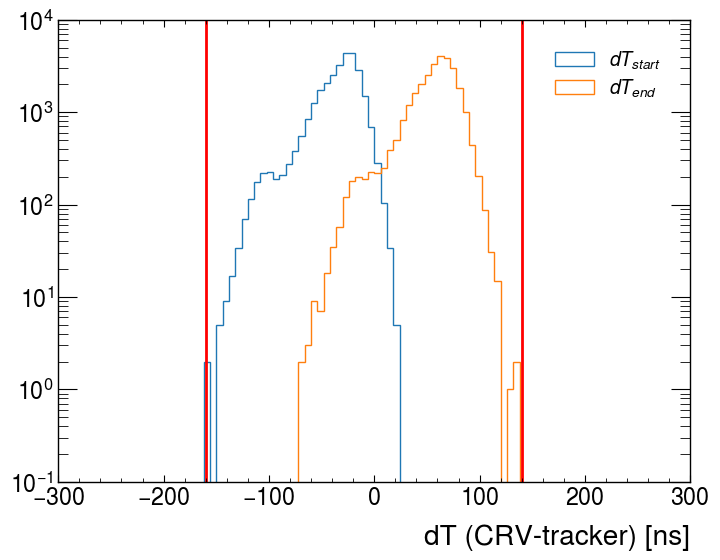

In [ ]:
plt.hist(dfCRY5.query(cut_extmom+'& crvinfo_PEs>0')['crvinfo_dTs'], bins=100, range=(-300,300), histtype='step', label='$dT_{start}$');
plt.hist(dfCRY5.query(cut_extmom+'& crvinfo_PEs>0')['crvinfo_dTe'], bins=100, range=(-300,300), histtype='step', label='$dT_{end}$');
plt.axvline(x=140, color='red')
plt.axvline(x=-160, color='red')
plt.legend(loc='upper right')
plt.yscale('log')
plt.xlabel('dT (CRV-tracker) [ns]');

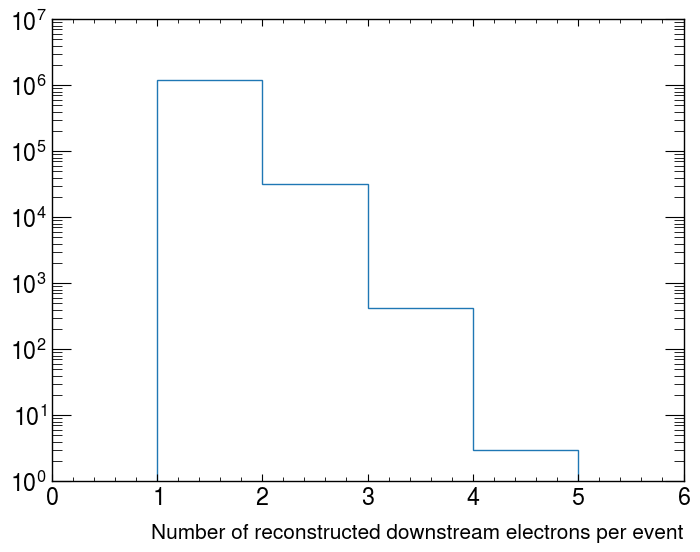

In [ ]:
plt.hist(dfCE.groupby(['evtinfo_subrunid',	'evtinfo_eventid', 'evtinfomc_nprotons']).size().reset_index()[0], histtype='step', bins=6, range=(0,6));
plt.xlabel('Number of reconstructed downstream electrons per event', fontsize=15)
plt.yscale('log')

#PS sources at the end of micro-bunch

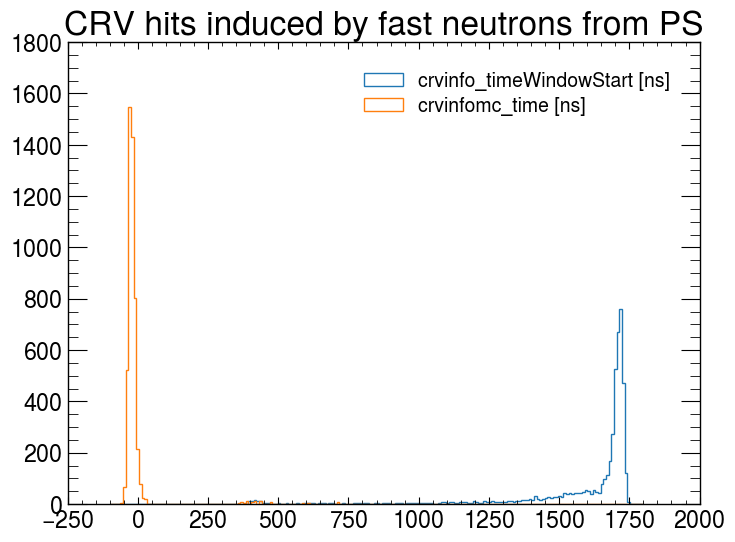

In [ ]:
plt.hist(dfCE.query('crvinfomc_parentPdgId==2112 & crvinfomc_parentZ<-5000 &'+cut_t0)['crvinfo_timeWindowStart'], histtype='step', bins=200, range=(-100, 1800), label='crvinfo_timeWindowStart [ns]');
plt.hist(dfCE.query('crvinfomc_parentPdgId==2112 & crvinfomc_parentZ<-5000 &'+cut_t0)['crvinfomc_time'], histtype='step', bins=200, range=(-100, 1800), label='crvinfomc_time [ns]');
plt.title('CRV hits induced by fast neutrons from PS')
plt.legend();

Text(0.5, 1.0, 'CRY')

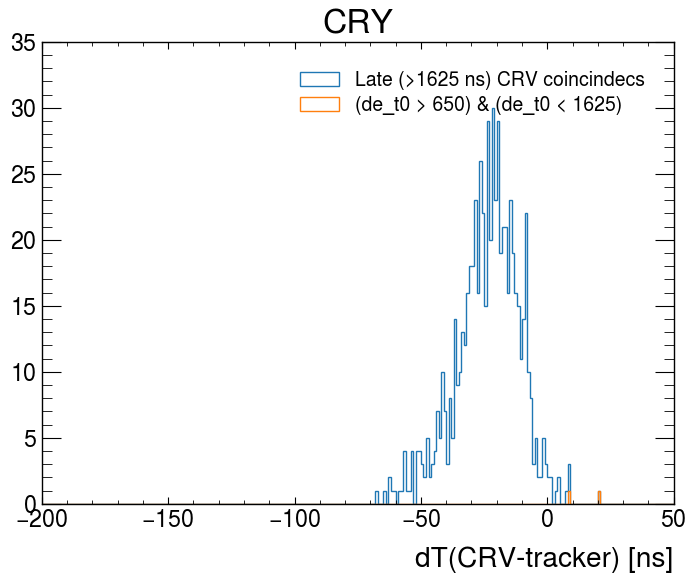

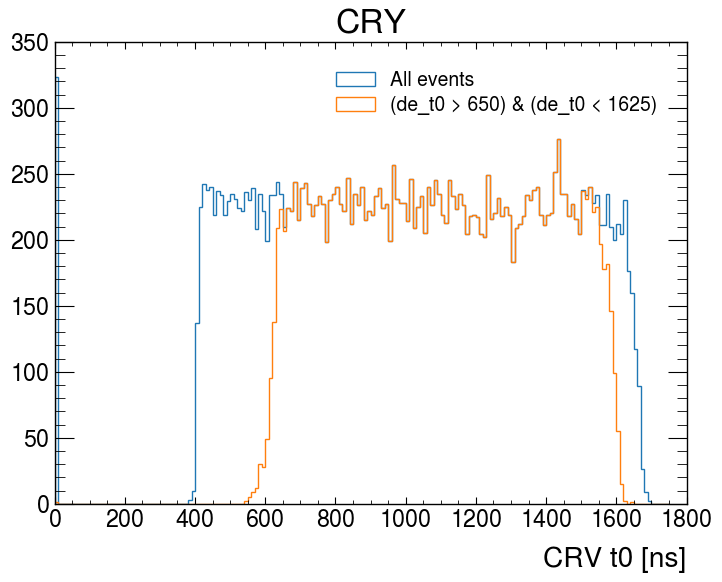

In [ ]:
cut_tmp=cut_extmom_notiming+'& crvsummarymc_z>-9999'
plt.hist(dfCRY5.query(cut_tmp+'& crvinfo_timeWindowStart>1625')['crvinfo_dT'], histtype='step', bins=250, range=(-200, 50), label='Late (>1625 ns) CRV coincindecs');
plt.hist(dfCRY5.query(cut_tmp+'& crvinfo_timeWindowStart>1625'+'&'+cut_t0)['crvinfo_dT'], histtype='step', bins=250, range=(-200, 50), label=cut_t0);
plt.title('CRY')
plt.legend()
plt.xlabel('dT(CRV-tracker) [ns]')

plt.figure()
plt.hist(dfCRY5.query(cut_tmp)['crvinfo_timeWindowStart'], histtype='step', bins=175, range=(0, 1750), label='All events');
plt.hist(dfCRY5.query(cut_tmp+'&'+cut_t0)['crvinfo_timeWindowStart'], histtype='step', bins=175, range=(0, 1750), label=cut_t0);
plt.legend()
plt.xlabel('CRV t0 [ns]')
plt.title('CRY')

#Oversampling factor

In [ ]:
df_tmp = dfCE.query('crvinfo_PEs>0 & '+ cut_t0).groupby(['crvinfomc_x',	'crvinfomc_y', 'crvinfomc_z', 'crvinfomc_parentX', 'crvinfomc_parentZ', 'crvinfomc_parentPdgId', 'crvinfomc_gparentX', 'crvinfomc_gparentZ', 'crvinfomc_gparentPdgId', 'crvinfomc_pdgId', 'crvinfomc_time']).size().reset_index()
df_tmp.rename(columns={0:'sampling_factor'}, inplace=True)

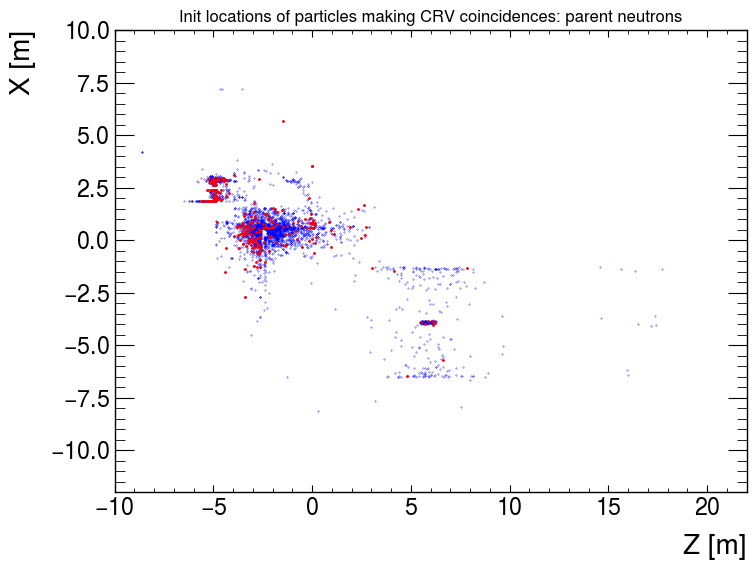

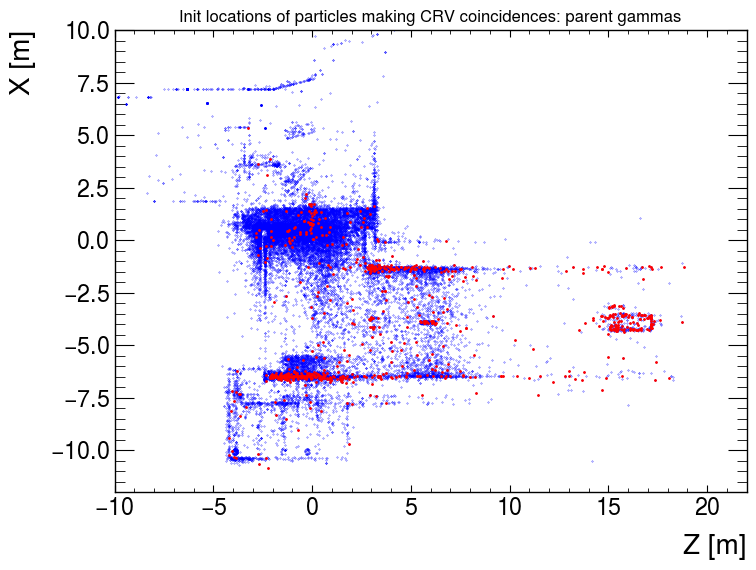

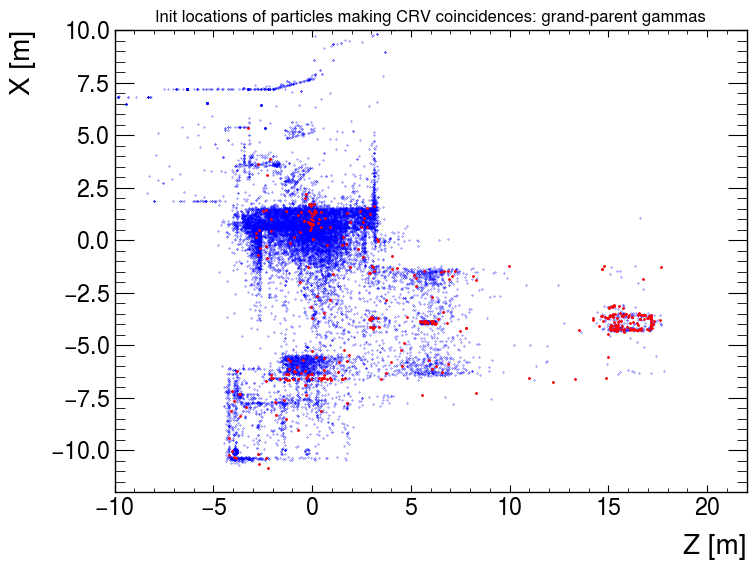

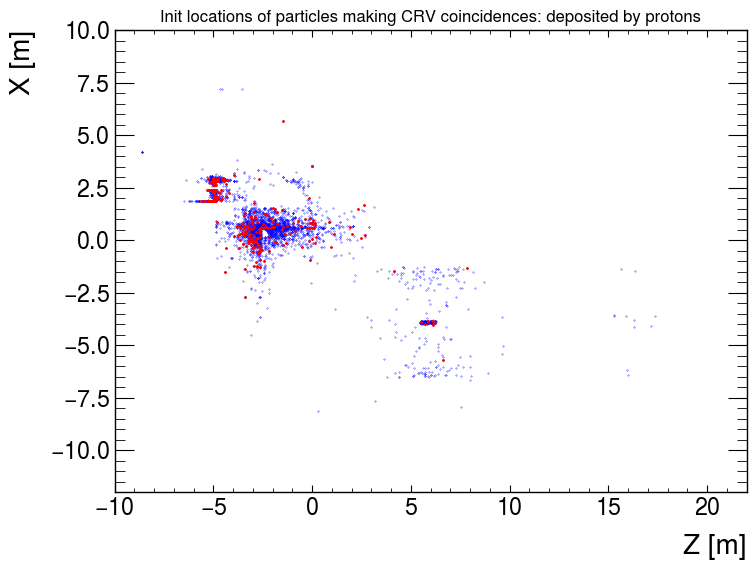

In [ ]:
df_tmp2 = df_tmp.query('crvinfomc_parentPdgId==2112 & sampling_factor>1 & crvinfomc_time>-100')
plt.plot(df_tmp2['crvinfomc_parentZ']/1000, df_tmp2['crvinfomc_parentX']/1000, '.b', markersize=0.5);
df_tmp2 = df_tmp.query('crvinfomc_parentPdgId==2112 & sampling_factor>10 & crvinfomc_time>-100')
plt.plot(df_tmp2['crvinfomc_parentZ']/1000, df_tmp2['crvinfomc_parentX']/1000, '.r', markersize=2.0);
plt.ylim(-12, 10)
plt.xlim(-10, 22)
plt.title('Init locations of particles making CRV coincidences: parent neutrons', fontsize=12)
plt.xlabel('Z [m]')
plt.ylabel('X [m]')

plt.figure()
df_tmp2 = df_tmp.query('crvinfomc_parentPdgId==22 & sampling_factor>1')
plt.plot(df_tmp2['crvinfomc_parentZ']/1000, df_tmp2['crvinfomc_parentX']/1000, '.b', markersize=0.5);
df_tmp2 = df_tmp.query('crvinfomc_parentPdgId==22 & sampling_factor>10')
plt.plot(df_tmp2['crvinfomc_parentZ']/1000, df_tmp2['crvinfomc_parentX']/1000, '.r', markersize=2.0);
plt.ylim(-12, 10)
plt.xlim(-10, 22)
plt.title('Init locations of particles making CRV coincidences: parent gammas', fontsize=12)
plt.xlabel('Z [m]')
plt.ylabel('X [m]')

plt.figure()
df_tmp2 = df_tmp.query('crvinfomc_gparentPdgId==22 & sampling_factor>1')
plt.plot(df_tmp2['crvinfomc_gparentZ']/1000, df_tmp2['crvinfomc_gparentX']/1000, '.b', markersize=0.5);
df_tmp2 = df_tmp.query('crvinfomc_gparentPdgId==22 & sampling_factor>10')
plt.plot(df_tmp2['crvinfomc_gparentZ']/1000, df_tmp2['crvinfomc_gparentX']/1000, '.r', markersize=2.0);
plt.ylim(-12, 10)
plt.xlim(-10, 22)
plt.title('Init locations of particles making CRV coincidences: grand-parent gammas', fontsize=12)
plt.xlabel('Z [m]')
plt.ylabel('X [m]')

plt.figure()
df_tmp2 = df_tmp.query('crvinfomc_pdgId==2212 & sampling_factor>1')
plt.plot(df_tmp2['crvinfomc_gparentZ']/1000, df_tmp2['crvinfomc_gparentX']/1000, '.b', markersize=0.5);
df_tmp2 = df_tmp.query('crvinfomc_pdgId==2212 & sampling_factor>10')
plt.plot(df_tmp2['crvinfomc_gparentZ']/1000, df_tmp2['crvinfomc_gparentX']/1000, '.r', markersize=2.0);
plt.ylim(-12, 10)
plt.xlim(-10, 22)
plt.title('Init locations of particles making CRV coincidences: deposited by protons', fontsize=12)
plt.xlabel('Z [m]')
plt.ylabel('X [m]');

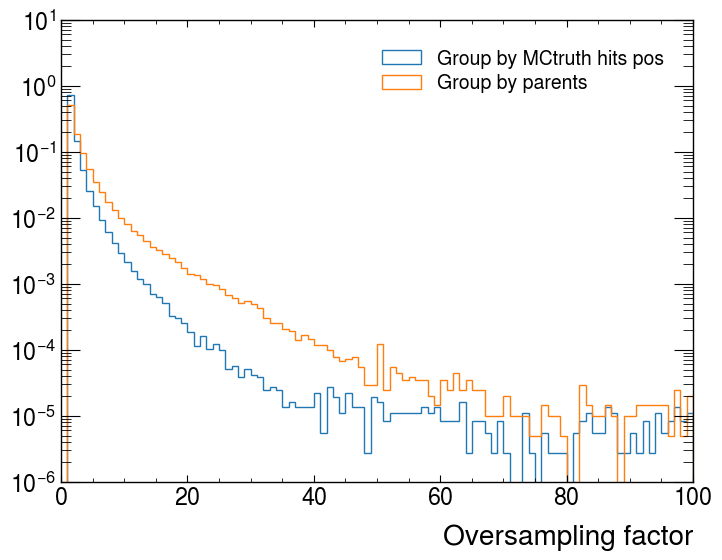

In [ ]:
df_tmp = dfCE.query('crvinfo_PEs>0 & '+ cut_t0).groupby(['crvinfomc_x',	'crvinfomc_y', 'crvinfomc_z']).size().reset_index()
df_tmp.rename(columns={0:'sampling_factor'}, inplace=True)
plt.hist(df_tmp['sampling_factor'], histtype='step', density=True, bins=100, range=(0, 100), label='Group by MCtruth hits pos');

df_tmp = dfCE.query('crvinfo_PEs>0 & '+ cut_t0).groupby(['crvinfomc_parentX',	'crvinfomc_parentY', 'crvinfomc_parentZ']).size().reset_index()
df_tmp.rename(columns={0:'sampling_factor'}, inplace=True)
plt.hist(df_tmp['sampling_factor'], histtype='step', density=True, bins=100, range=(0, 100), label='Group by parents');

plt.xlabel('Oversampling factor');
plt.legend()
plt.yscale('log')

#Coincidence sources

<Figure size 800x600 with 0 Axes>

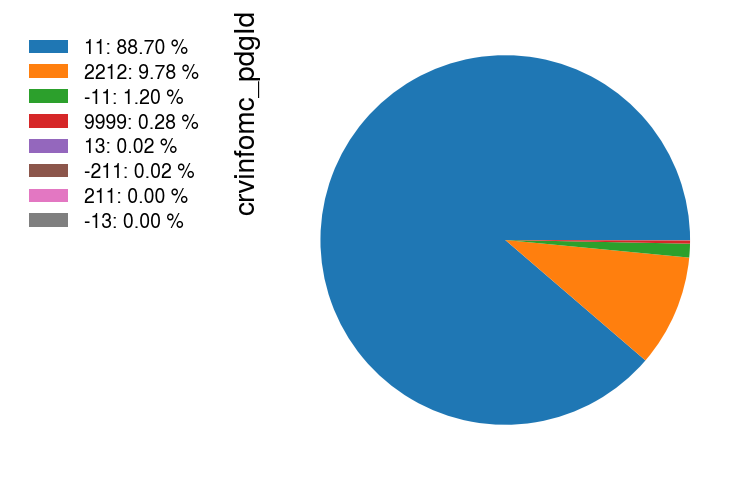

<Figure size 800x600 with 0 Axes>

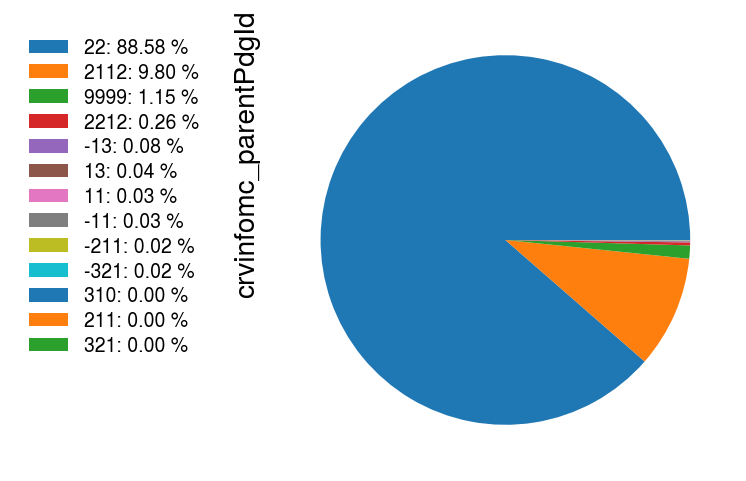

<Figure size 800x600 with 0 Axes>

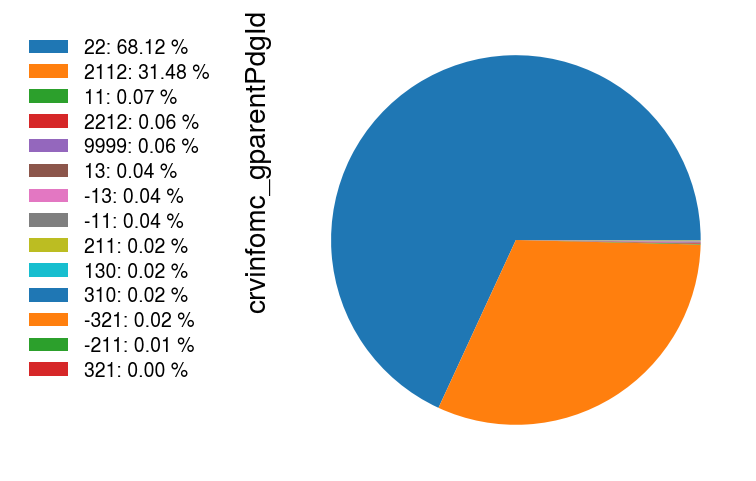

In [ ]:
def plot_pie(var):
  plt.figure()
  df_tmp = dfCE.query('crvinfo_PEs>0')[var].clip(upper=9999).to_frame()
  df_tmp = df_tmp.groupby([var]).size().to_frame().reset_index()
  df_tmp.rename(columns={0:'counts'}, inplace=True)
  df_tmp.sort_values('counts', inplace=True, ascending=False)

  df_tmp.plot(kind='pie', y='counts', labels=None)
  plt.ylabel(var)

  # Calculate percentages
  percent = 100.*df_tmp.counts/df_tmp.counts.sum()
  # Write labels
  labels = ['{0}: {1:1.2f} %'.format(i,j) for i,j in zip(df_tmp[var], percent)]
  plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=14);

plot_pie('crvinfomc_pdgId')
plot_pie('crvinfomc_parentPdgId')
plot_pie('crvinfomc_gparentPdgId')

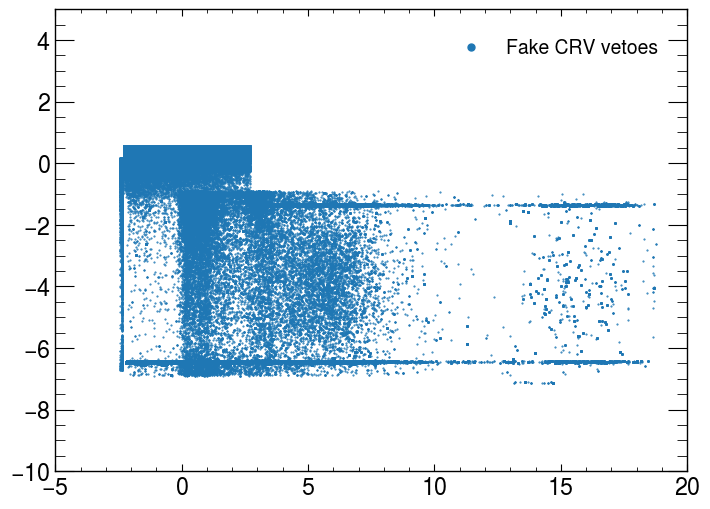

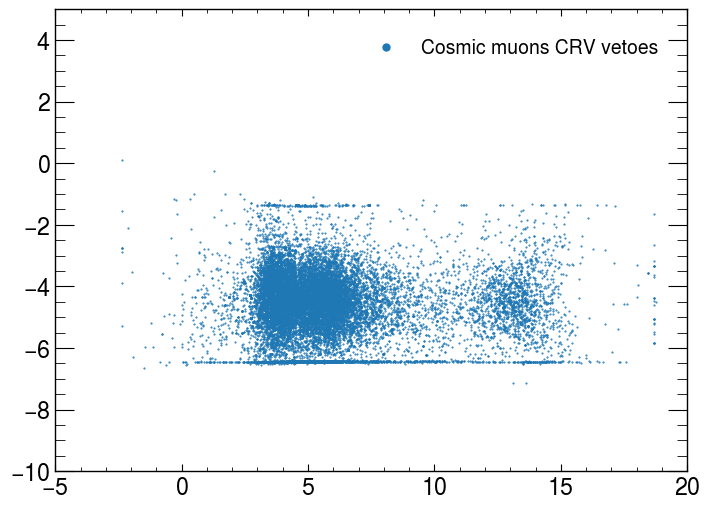

In [ ]:
plt.plot(dfCE.query(cut_extmom)['crvsummarymc_z']/1000, dfCE.query(cut_extmom)['crvsummarymc_x']/1000, '.', label='Fake CRV vetoes', markersize=1.0)
plt.xlim(-5,20)
plt.ylim(-10,5)
plt.legend();
lgnd = plt.legend()
lgnd.legendHandles[0].set_markersize(10)

plt.figure()
plt.plot(dfCRY5.query(cut_extmom)['crvsummarymc_z']/1000, dfCRY5.query(cut_extmom)['crvsummarymc_x']/1000, '.', label='Cosmic muons CRV vetoes', markersize=1.)
plt.xlim(-5,20)
plt.ylim(-10,5)
plt.legend();
lgnd = plt.legend()
lgnd.legendHandles[0].set_markersize(10)

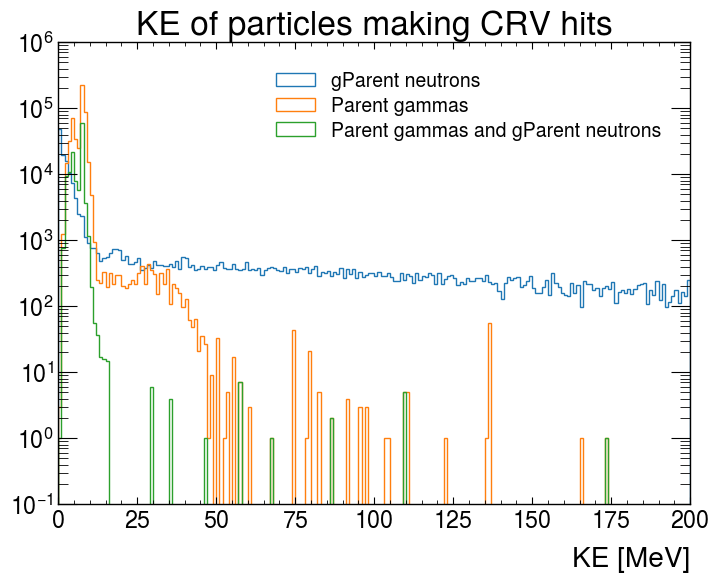

In [ ]:
plt.hist(dfCE.query(cut_extmom+'& crvinfomc_gparentPdgId==2112')['crvinfomc_gparentE'], range=(0, 200), bins=200, histtype='step', label='gParent neutrons');
plt.hist(dfCE.query(cut_extmom+'& crvinfomc_parentPdgId==22')['crvinfomc_parentE'], range=(0, 200), bins=200, histtype='step', label='Parent gammas');
plt.hist(dfCE.query(cut_extmom+'& crvinfomc_parentPdgId==22 & crvinfomc_gparentPdgId==2112')['crvinfomc_parentE'], range=(0, 200), bins=200, histtype='step', label='Parent gammas and gParent neutrons');
plt.xlabel('KE [MeV]')
plt.title('KE of particles making CRV hits')
plt.legend()
plt.yscale('log')

Text(0.5, 1.0, 'Origins of cosmics')

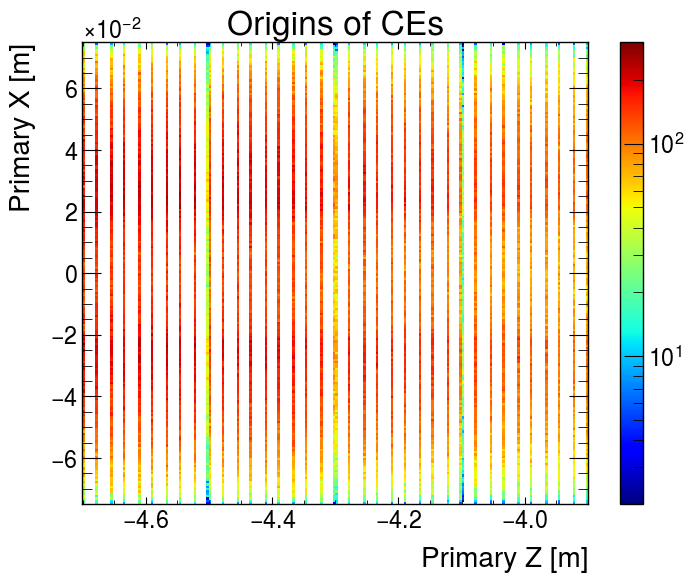

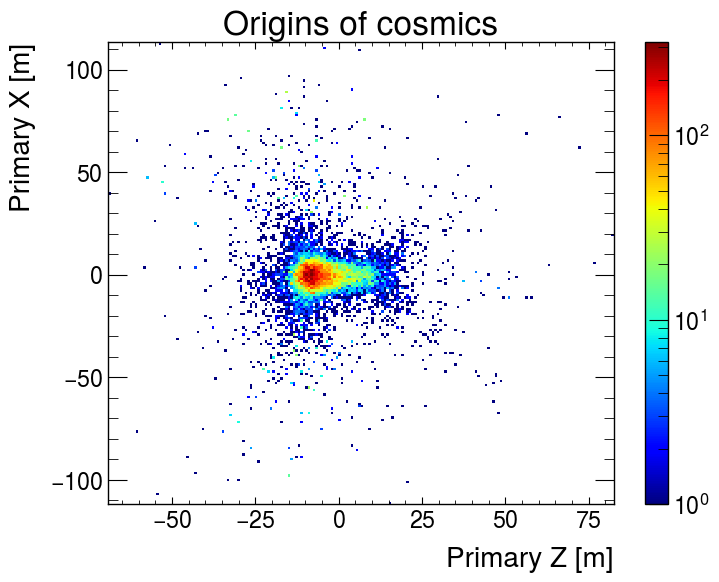

In [ ]:
h=plt.hist2d(dfCE.query(cut_extmom)['demcpri_posZ']/1000, dfCE.query(cut_extmom)['demcpri_posX']/1000, bins = 200, norm=mpl.colors.LogNorm(), cmap=plt.cm.jet);
plt.colorbar(h[3])
plt.xlabel('Primary Z [m]')
plt.ylabel('Primary X [m]');
plt.title('Origins of CEs')

plt.figure()
h=plt.hist2d(dfCRY5.query(cut_extmom)['demcpri_posZ']/1000, dfCRY5.query(cut_extmom)['demcpri_posX']/1000, bins = 200, norm=mpl.colors.LogNorm(), cmap=plt.cm.jet);
plt.colorbar(h[3])
plt.xlabel('Primary Z [m]')
plt.ylabel('Primary X [m]');
plt.title('Origins of cosmics')

#Variables to discriminate noise from cosmics

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:6607: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:6608: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


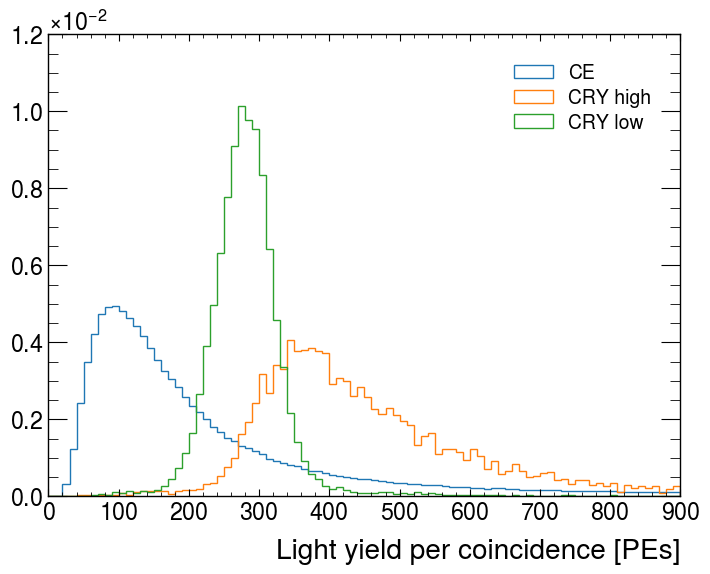

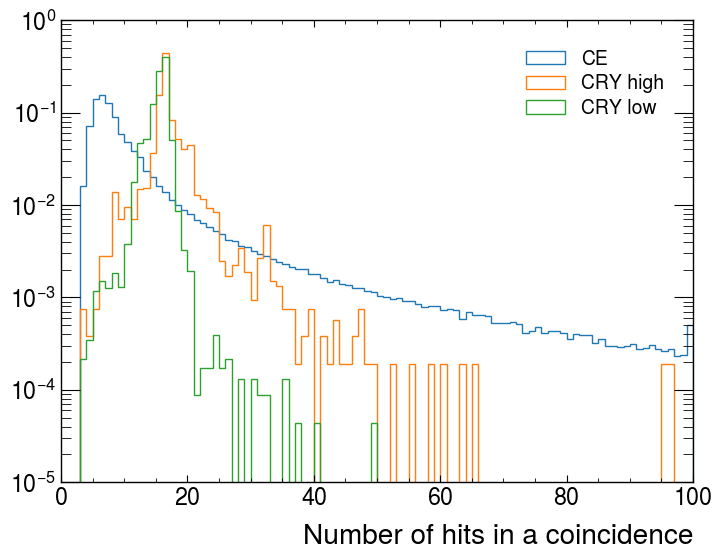

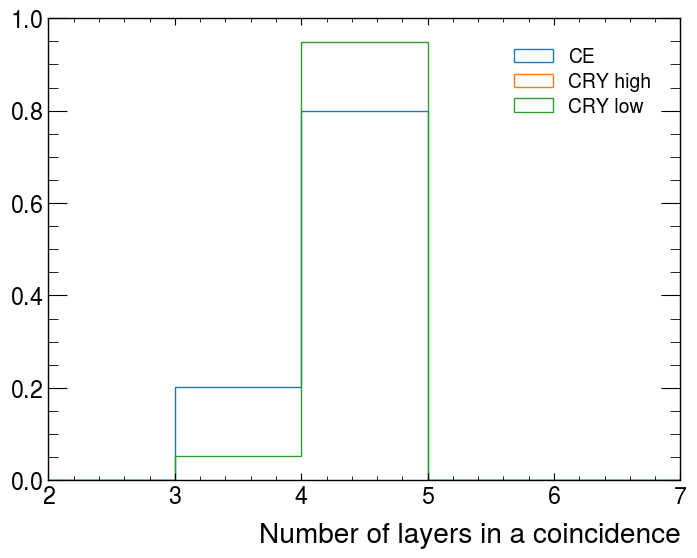

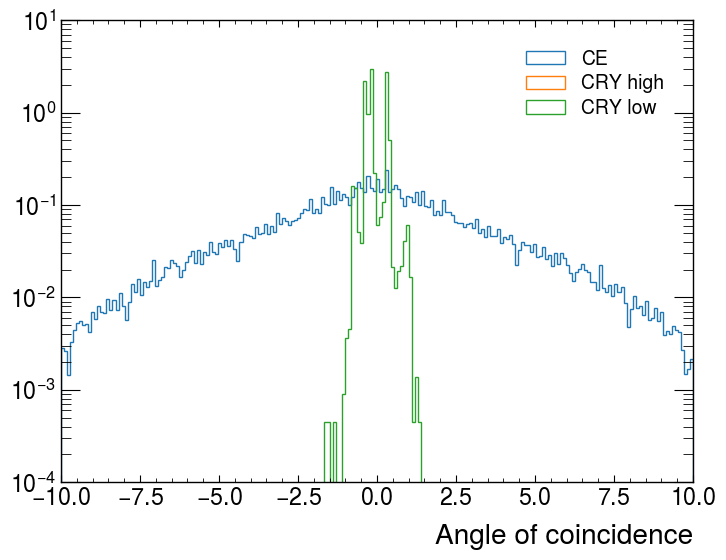

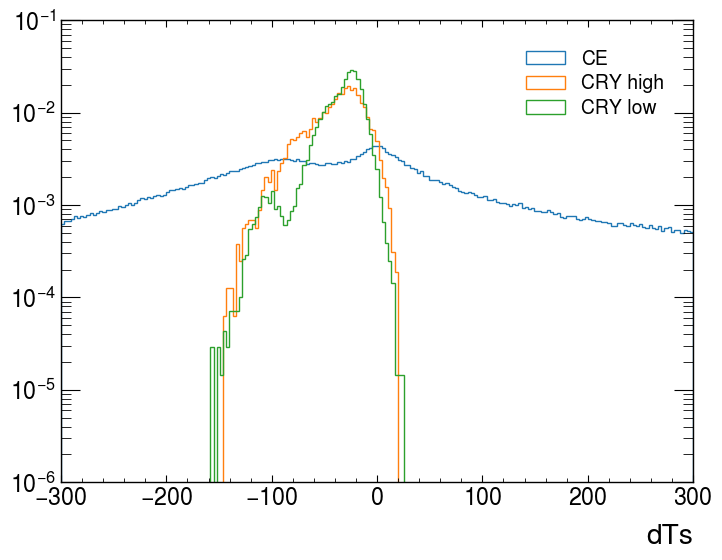

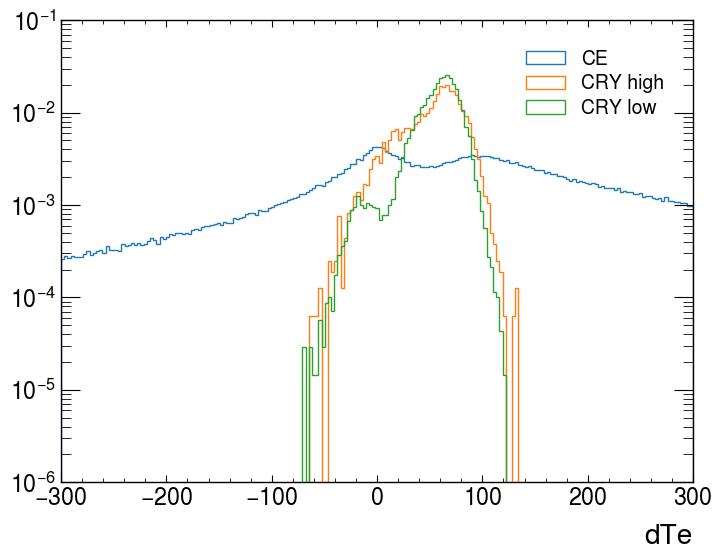

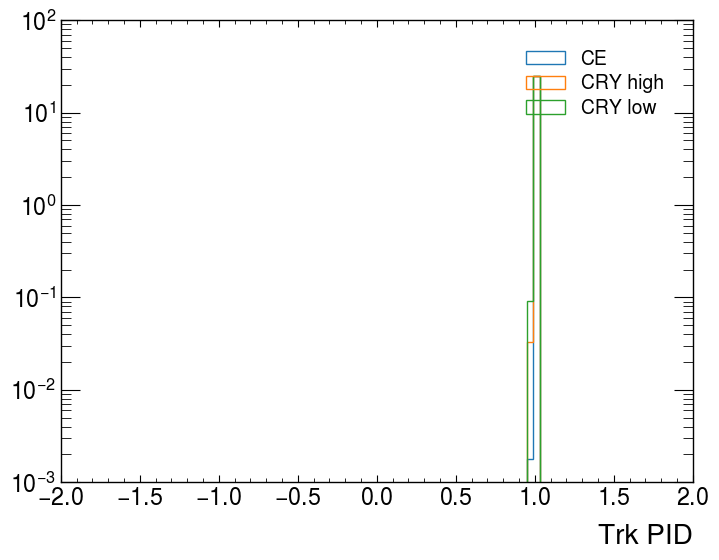

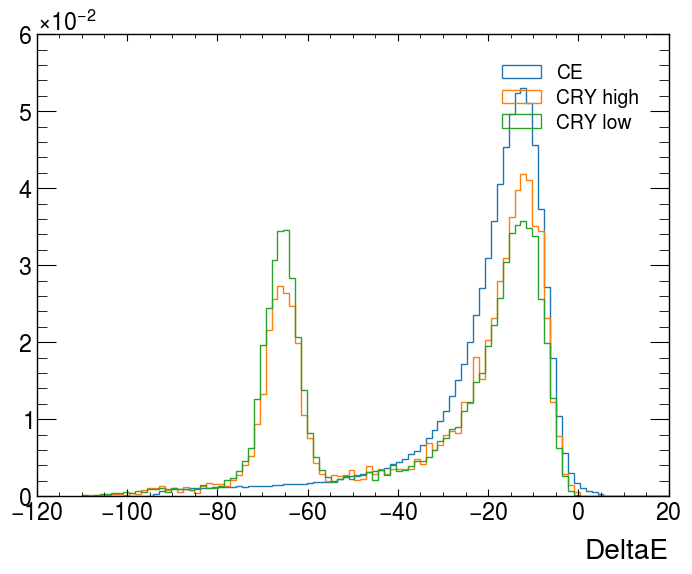

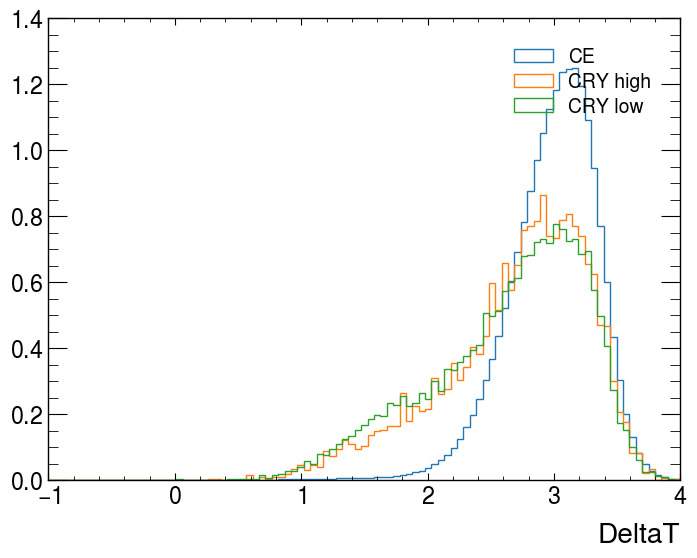

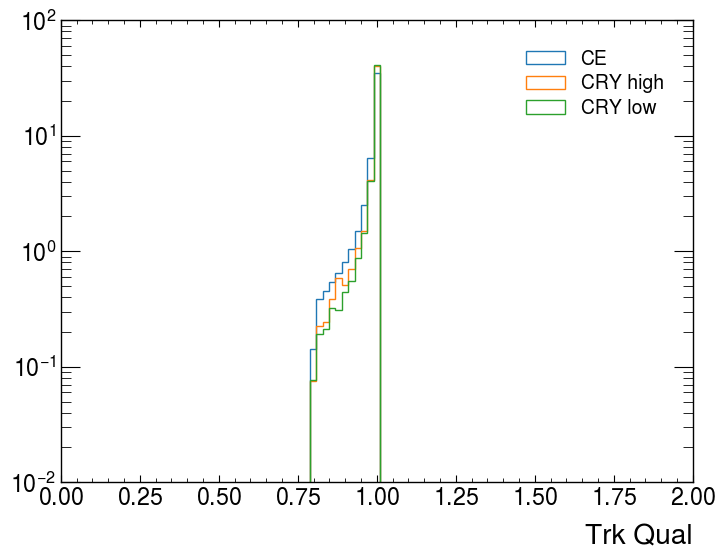

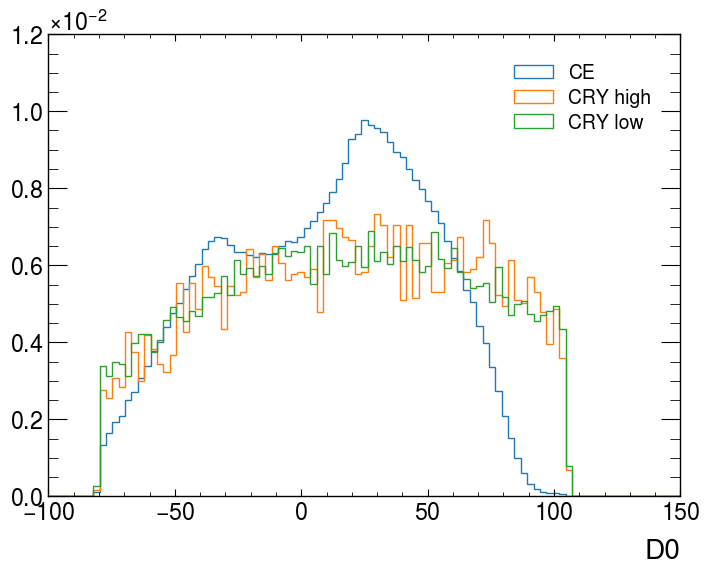

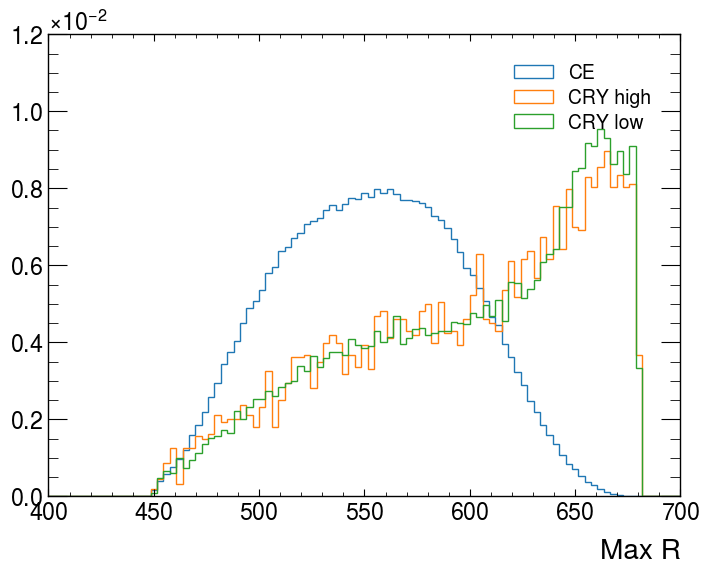

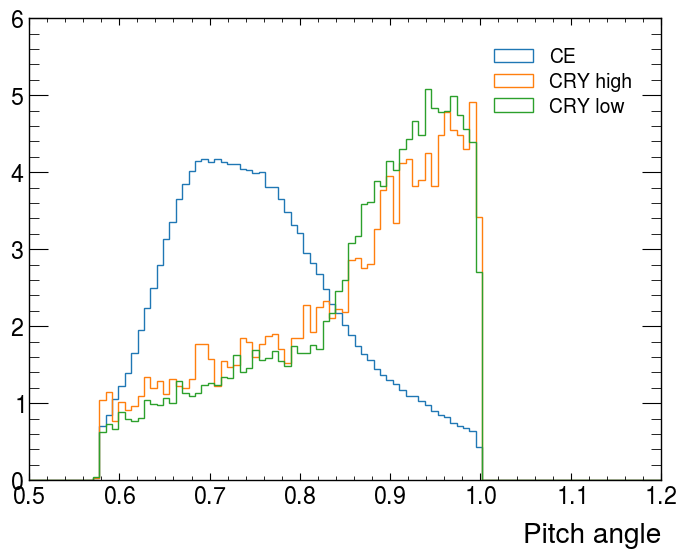

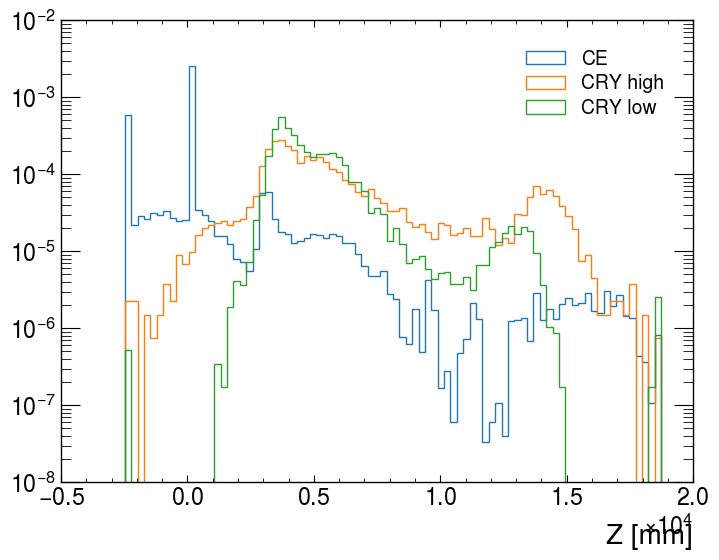

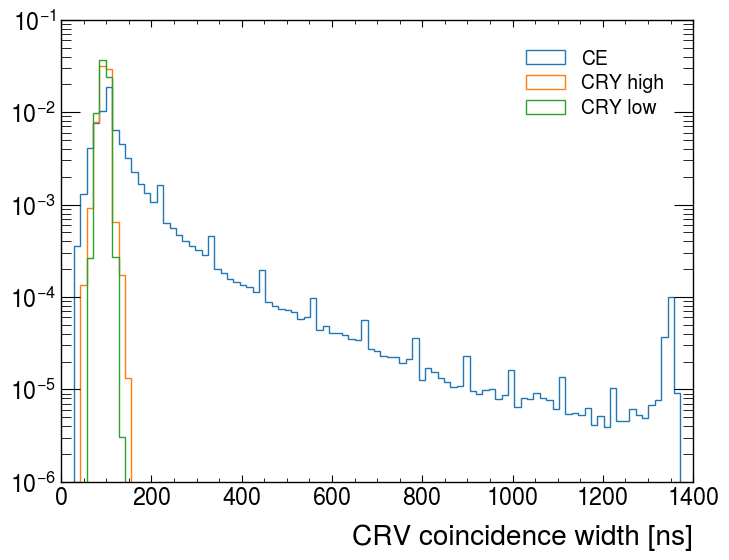

In [ ]:
def compare_hist(var, bins, xlabel, logy=False):
  plt.figure()
  plt.hist(dfCE.query(cut_extmom+'& crvinfo_PEs>0')[var], bins=bins, histtype='step', label='CE', density=True);
  plt.hist(dfCRY5.query(cut_extmom+'& is_high==1 & crvinfo_PEs>0')[var], bins=bins, histtype='step', label='CRY high', density=True);
  plt.hist(dfCRY5.query(cut_extmom+'& is_high==0 & crvinfo_PEs>0')[var], bins=bins, histtype='step', label='CRY low', density=True);
  if logy:
    plt.yscale('log')
  plt.xlabel(xlabel)
  plt.legend();

compare_hist('crvinfo_PEs', np.linspace(0, 900, 91), 'Light yield per coincidence [PEs]')
compare_hist('crvinfo_nCoincidenceHits', np.linspace(0, 100, 101), 'Number of hits in a coincidence', True)
compare_hist('crvinfo_nCoincidenceLayers', np.linspace(2, 7, 6), 'Number of layers in a coincidence')
compare_hist('crvinfo_angle', np.linspace(-10, 10, 210), 'Angle of coincidence', True)
compare_hist('crvinfo_dTs', np.linspace(-300, 300, 200), 'dTs', True)
compare_hist('crvinfo_dTe', np.linspace(-300, 300, 200), 'dTe', True)
compare_hist('dequal_TrkPID', np.linspace(-2, 2, 100), 'Trk PID', True)
compare_hist('detrkpid_DeltaE', np.linspace(-110, 20, 100), 'DeltaE')
compare_hist('detrkpid_DeltaT', np.linspace(-1, 4, 100), 'DeltaT')

compare_hist('dequal_TrkQual', np.linspace(0, 2, 100), 'Trk Qual', True)
compare_hist('deent_d0', np.linspace(-100, 150, 100), 'D0')
compare_hist('deent_maxr', np.linspace(400, 700, 100), 'Max R')
compare_hist('deent_td', np.linspace(0.5, 1.2, 100), 'Pitch angle')
compare_hist('crvinfo_z', np.linspace(-5000, 20000, 100), 'Z [mm]', True)


dfCRY5['crvinfo_windowSize'] = dfCRY5['crvinfo_timeWindowEnd'] - dfCRY5['crvinfo_timeWindowStart']
dfCE['crvinfo_windowSize'] = dfCE['crvinfo_timeWindowEnd'] - dfCE['crvinfo_timeWindowStart']
compare_hist('crvinfo_windowSize', np.linspace(0, 1400, 100), 'CRV coincidence width [ns]', True)


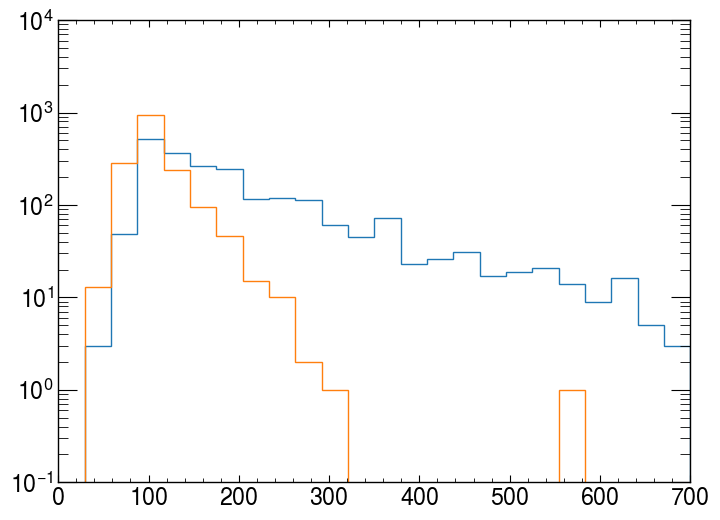

In [ ]:
df_tmp = dfCE.query(cut_extmom+'&'+crv_time+'& evtinfomc_nprotons>5E7 & crvinfo_crvSectorType==4').groupby(['evtinfo_eventid','evtinfo_subrunid'])['crvinfo_windowSize'].agg('sum')
plt.hist(df_tmp.reset_index()['crvinfo_windowSize'], histtype='step', bins=np.linspace(0,700, 25));
df_tmp = dfCE.query(cut_extmom+'&'+crv_time+'& evtinfomc_nprotons>5E7 & crvinfo_crvSectorType==5').groupby(['evtinfo_eventid','evtinfo_subrunid'])['crvinfo_windowSize'].agg('sum')
plt.hist(df_tmp.reset_index()['crvinfo_windowSize'], histtype='step', bins=np.linspace(0,700, 25));
plt.yscale('log')

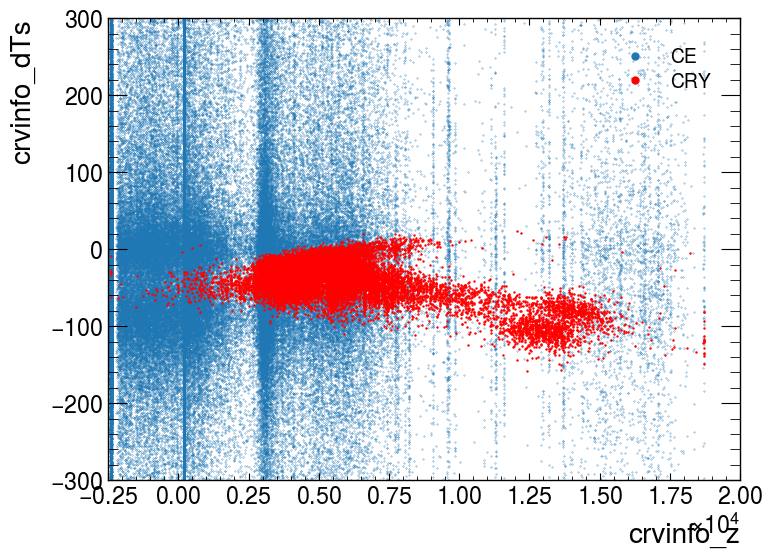

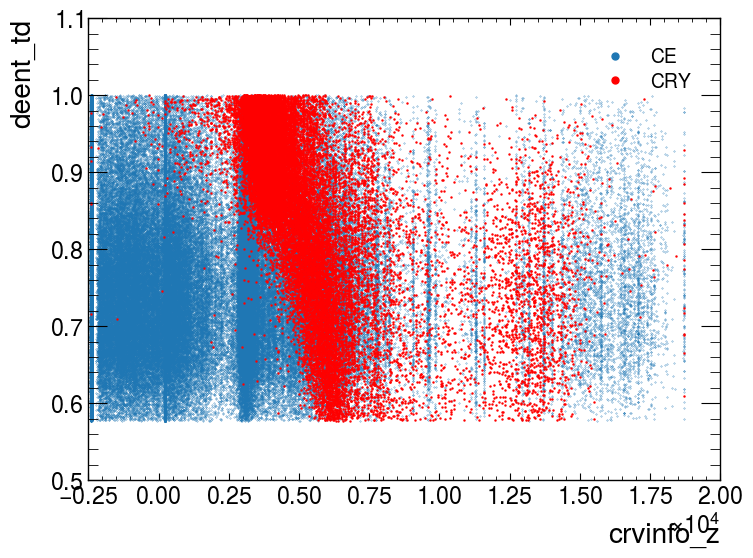

In [ ]:
def compare_plot(var1, var2, rangeX=None, rangeY=None):
  plt.figure()
  plt.plot(dfCE.query(cut_extmom+'& crvinfo_PEs>0')[var1], dfCE.query(cut_extmom+'& crvinfo_PEs>0')[var2],  '.', label='CE', markersize=0.5);
  plt.plot(dfCRY5.query(cut_extmom+'& crvinfo_PEs>0')[var1], dfCRY5.query(cut_extmom+'& crvinfo_PEs>0')[var2],  '.r', label='CRY', markersize=1.5);
  if rangeY is not None:
    plt.ylim(rangeY)
  if rangeX is not None:
    plt.xlim(rangeX)
  plt.xlabel(var1)
  plt.ylabel(var2)
  lgnd = plt.legend()
  lgnd.legendHandles[0].set_markersize(10)
  lgnd.legendHandles[1].set_markersize(10)

compare_plot('crvinfo_z', 'crvinfo_dTs', rangeY=(-300, 300))
compare_plot('crvinfo_z', 'deent_td');


#Calo variables

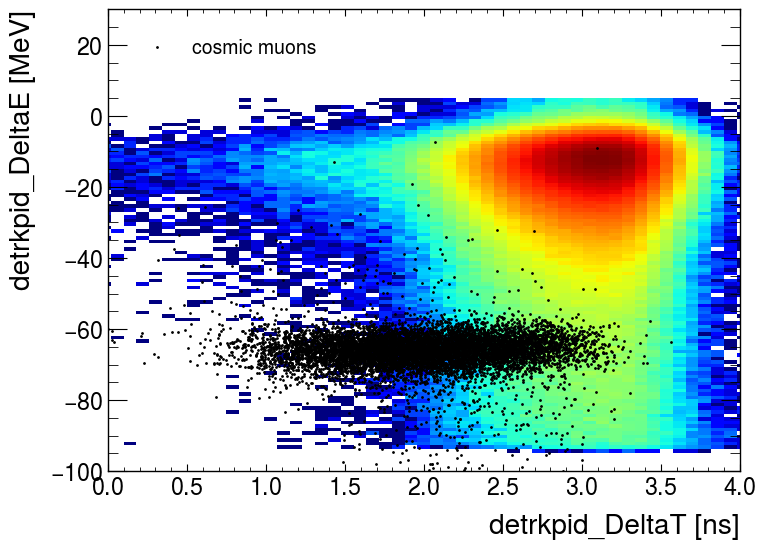

In [ ]:
cut_tmp = cut_extmom+'& abs(demc_pdg) == 11'
plt.hist2d(dfCE.query(cut_tmp)['detrkpid_DeltaT'], dfCE.query(cut_tmp)['detrkpid_DeltaE'], bins = 100, norm=mpl.colors.LogNorm(), cmap=plt.cm.jet, label='CE');
cut_tmp = cut_extmom+'& abs(demc_pdg) == 13'
plt.plot(dfCRY5.query(cut_tmp)['detrkpid_DeltaT'], dfCRY5.query(cut_tmp)['detrkpid_DeltaE'], '.k', markersize='2.0', label='cosmic muons');

plt.xlabel('detrkpid_DeltaT [ns]')
plt.ylabel('detrkpid_DeltaE [MeV]')
plt.xlim(0,4)
plt.ylim(-100,30);
plt.legend(loc='upper left');

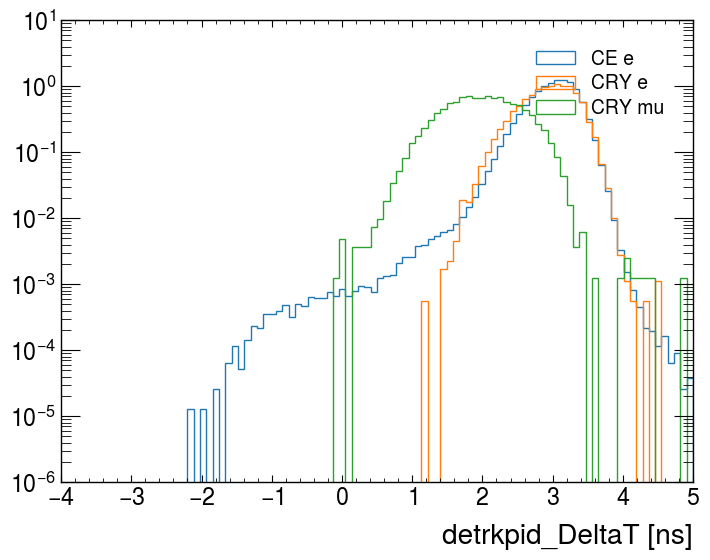

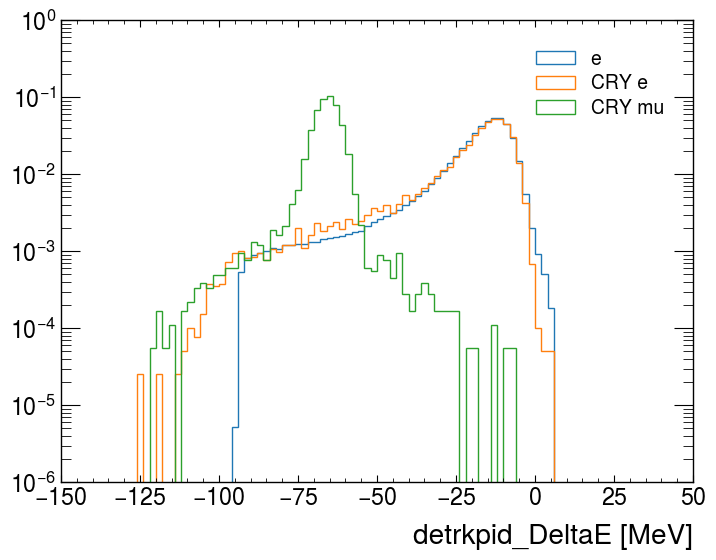

In [ ]:
plt.figure()
plt.hist(dfCE.query(cut_extmom+'& abs(demc_pdg) == 11')['detrkpid_DeltaT'], bins = 100, range=(-4,5), histtype='step', label='CE e', density=True);
plt.hist(dfCRY5.query(cut_extmom+'& abs(demc_pdg) == 11')['detrkpid_DeltaT'], bins = 100, range=(-4,5), histtype='step', label='CRY e', density=True);
plt.hist(dfCRY5.query(cut_extmom+'& abs(demc_pdg) == 13')['detrkpid_DeltaT'], bins = 100, range=(-4,5), histtype='step', label='CRY mu', density=True);
plt.xlabel('detrkpid_DeltaT [ns]')
plt.yscale('log')
plt.legend()

plt.figure()
plt.hist(dfCE.query(cut_extmom+'& abs(demc_pdg) == 11 ')['detrkpid_DeltaE'], bins = 100, range=(-150,50), histtype='step', label='e', density=True);
plt.hist(dfCRY5.query(cut_extmom+'& abs(demc_pdg) == 11')['detrkpid_DeltaE'], bins = 100, range=(-150,50), histtype='step', label='CRY e', density=True);
plt.hist(dfCRY5.query(cut_extmom+'& abs(demc_pdg) == 13')['detrkpid_DeltaE'], bins = 100, range=(-150,50), histtype='step', label='CRY mu', density=True);
plt.xlabel('detrkpid_DeltaE [MeV]')
plt.yscale('log')
plt.legend();